# Clustering on Workforce Diversity Outcomes Record Dataset

## 1. Introduction

My feature data X is the 

## 2. Theory

### Clustering Method 1: K-means

K-means clustering is the simplest clustering method and is best used for neatly grouped data points. This method involves grouping data points into clusters based on Euclidean distance. This algorithm selects data points based on an input k number of clusters. For example, if you give the input k = 5, that means you want to find 5 clusters. After inputting the number k, the algorithm selects an initial k number of data points in the dataset. This initial set of k data points is the initial centroids, or centers of clusters. 

The algorithm calculates the distance between one random data point and each of the selected centroids. For that random data point, K-means picks the closest centroid, and assigns the data point to that centroid's cluster. The algorithm repeats this process of computing the distance and picking the closest centroid for the rest of the data points. After going through all data points, the algorithm sums up the variance of each of the clusters and stores it. 

After the initial set of centroids, K-means algorithm randomly selects another set of centroids and repeats the process. It calculates the distances between each data point and each centroid, and then sums up the variance of each cluster. The algorithm repeats this process however many times you specify it to, such as in max_iter parameter in the KMeans function.

There are several ways to tune the accuracy of the K-means model, namely adjust the k parameter. The "elbow plot" method is a common model tuning method that plots the reduction in variation against the number of clusters (k). The optimal number of clusters (k) is where there is an "elbow", which means an inflection or sharp reduction in variation, after which the variation reduces much more slowly. The second common method is silhouette analysis, which measures the silhouette coefficient for each value of K. The coefficient compares the similarity between each data point within its cluster with other clusters. The k value that gives the highest silhouette coefficient is the optimal k value. 

"StatQuest: K-Means" https://www.youtube.com/watch?v=4b5d3muPQmA

### Clustering Method 2: DBSCAN

DBSCAN, an abbreviation of density-based spatial clustering of applications with noise, is a clustering method that uses density to identify clusters. Unlike K-means, DBSCAN can handle more complicated, nested clusters that involve many features. 

DBSCAN operates by first counting the number of points close to each data point (let's call these "core points"), within a circle with a given radius. Then, DBSCAN selects core points that have at least a given number of core points within their own circles. 

After selecting data points that have at least a certain number of core points next to them, DBSCAN assigns one of those points to start a cluster. DBSCAN adds nearby core points to that cluster and keeps going until there are no more core points to add. Then, DBSCAN adds nearby non-core points (points that don't meet the threshold of having a minimum number of core points next to them, but still within the radius of another core point) to that same cluster. 

DBSCAN repeats the process for the remaining core points that are not in the first cluster. That means that DBSCAN picks a random core point to start a second cluster, adds nearby core points to that cluster, then adds nearby non-core points to that cluster. 

The remaining non-core points that are not in any of the created clusters are then considered outliers. 

You can improve the accuracy of a DBSCAN algorithm by tuning several hyperparameters, including the following: the radius of each core point and the number of close points for a core point. In Sklearn.cluster.DBSCAN, You can tune the radius of each point by adjusting the eps parameter. In the same function, you can tune the number of close points for a core point using the min_samples parameter; note that this number includes the point itself. 

"StatQuest: DBSCAN" https://www.youtube.com/watch?v=RDZUdRSDOok
https://medium.com/@vitomirj/dbscan-clustering-algorithm-309e5616c3d7

### Clustering Method 3: Hierarchical Clustering

Hierarchical clustering is a broad group of clustering methods. There are two types of hierarchical clustering: divisive (top-down) and agglomerative (bottom-up). 

Divisive starts with a big group, and separate data into smaller clusters. Agglomerative starts with individual case, and pairs them up by similarity. Unlike K-means and DSCAN clustering methods, hierarchical clustering does not help you decide on how to cluster groups, so it is up to you to decide on the set of clusters based on the hierarchy derived. 

A dendrogram is often used to visualize hierarchical clustering. The height of each arm connecting two clusters shows how dissimilar the two clusters are. A short bar connecting two clusters means they are close, while a tall bar connecting two clusters means they are farther apart. You can clearly see what clusters will form on a dendrogram by drawing a straight line across the whole graph; the number of arms emerging immediately under the line gives you the number of clusters, and each set of groups under each arm gives you the resulting distinct clusters. 

"Flat and Hierarchical Clustering | The Dendrogram Explained" by 365 Data Science https://www.youtube.com/watch?v=ijUMKMC4f9I

## 3. Methods

### 3.1 Data Selection

As done for previous models for the record data, I chose demographic and workforce data of the six companies as X. I performed data cleaning steps, including creating dummy variables for categorical variables job_category, gender, and ethnicity. 

In [1]:
# Load essential libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Read csv file
df = pd.read_csv('../data/cleaned_wf_demo.csv', index_col=0)

# Convert relevant columns to categorical datatype
df['ethnicity'] = df['ethnicity'].astype('category')
df['gender'] = df['gender'].astype('category')

# Select categorical columns
cat_columns = df.select_dtypes(['category']).columns

# Apply cat codes to selected categorical columns
cat_df = df[cat_columns].apply(lambda x: x.cat.codes)
cat_df['gender'] = cat_df['gender'].astype('float')
cat_df['ethnicity'] = cat_df['ethnicity'].astype('float')

# Drop unnecessary columns
df = df.drop(['gender', 'ethnicity', 'inflow', 'outflow', 'count', 'job_category'], axis = 1)

# Confirm new column names and that there are no NAs
print(df.info())
print(cat_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42336 entries, 1 to 42336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   company    42336 non-null  object 
 1   seniority  42336 non-null  int64  
 2   salary     42336 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42336 entries, 1 to 42336
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     42336 non-null  float64
 1   ethnicity  42336 non-null  float64
dtypes: float64(2)
memory usage: 992.2 KB
None


In [2]:
# Set X

# Drop columns from df for X, as well as gender and ethnicity columns with strings
X = df.drop(['company'], axis = 1)

# Add numerical categorical columns to X
X = pd.concat([X, cat_df], axis = 1)
X

,seniority,salary,gender,ethnicity
1,4,6.296236e+05,0.0,0.0
2,3,8.108699e+03,1.0,0.0
3,5,5.206698e+02,1.0,0.0
4,1,1.124800e+07,1.0,0.0
5,3,8.842880e+06,0.0,0.0
...,...,...,...,...
42332,3,3.896572e+06,0.0,5.0
42333,1,1.119767e+07,1.0,5.0
42334,1,1.884711e+07,1.0,5.0
42335,5,7.431302e+07,0.0,5.0


In [3]:
X.info()
print(X.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42336 entries, 1 to 42336
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seniority  42336 non-null  int64  
 1   salary     42336 non-null  float64
 2   gender     42336 non-null  float64
 3   ethnicity  42336 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.6 MB
Index(['seniority', 'salary', 'gender', 'ethnicity'], dtype='object')


### 3.2 Feature Selection

When I trained the supervised machine learning models, I ran feature selection and decided to drop count, inflow, and outflow features because they were too closely correlated, which means they might not yield meaningful predictions. With those features removed already, I ran the feature selection again to confirm that the correlation of the features are strong along the diagonal and nowhere else. As shown in the correlation matrix below, each feature is not very closely correlated to other features, confirming the current feature selection.

Index(['seniority', 'salary', 'gender', 'ethnicity'], dtype='object')
(4, 4)


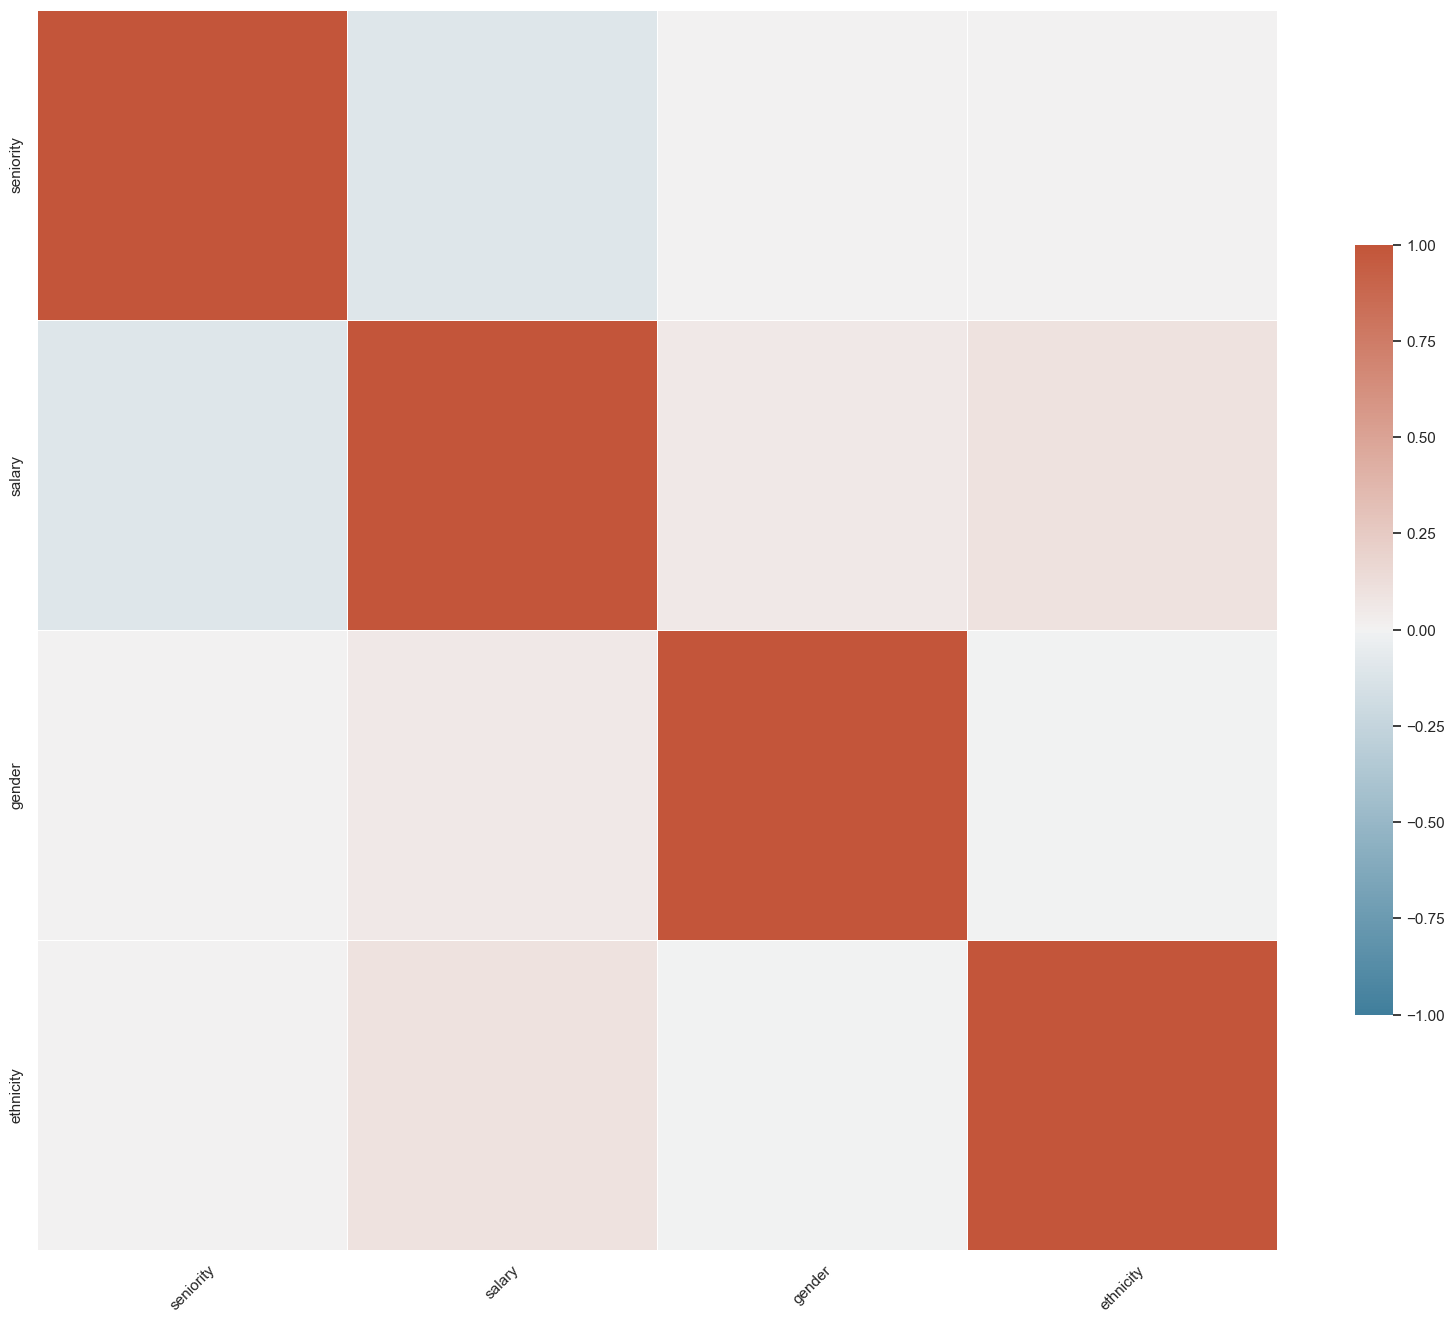

In [4]:
# Identify feature and target columns 
feature_cols = X.columns
print(feature_cols)

# Display heat-map for the correlation matrix
# Use X[feature_cols] instead of df[feature_cols] since we want to reference back to X
corr = X[feature_cols].corr(); 
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
# cbar_kws --> removing the shrink will space them out better

plt.xticks(rotation=45)

plt.show()

### 3.3 Hyperparameter Tuning for each Clustering Method

I calculated the distortion and inertia of various k values. Using the elbow method, it looks like k=3 gives the optimal k value, after which the drop in variance reduces slower in both graphs. 

,company,seniority,salary,nlables
1,Home Depot,4,6.296236e+05,0
2,Home Depot,3,8.108699e+03,0
3,Home Depot,5,5.206698e+02,0
4,Home Depot,1,1.124800e+07,0
5,Home Depot,3,8.842880e+06,0
...,...,...,...,...
42332,Goldman Sachs,3,3.896572e+06,0
42333,Goldman Sachs,1,1.119767e+07,0
42334,Goldman Sachs,1,1.884711e+07,0
42335,Accenture,5,7.431302e+07,0


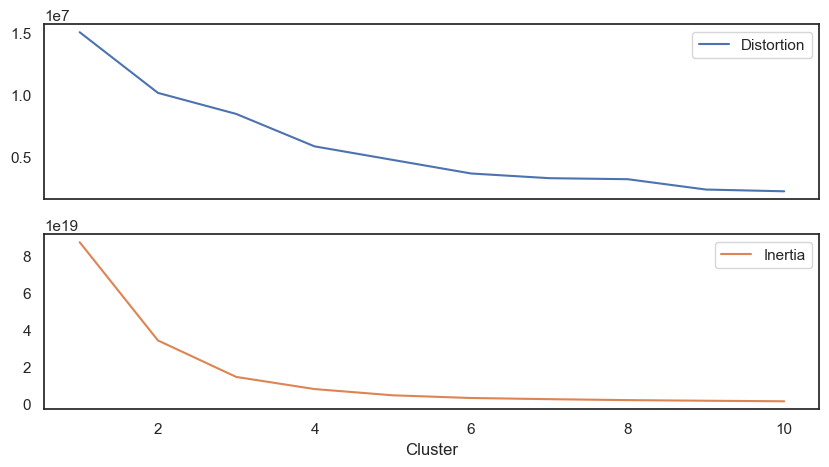

In [5]:
##### K-MEANS CLUSTERING #####

# Import relevant libraries for K-Means clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Evaluate the optimal number of clusters using the elbow method 
distortions = []
inertias = []
k = 11

for k in range(1,k):
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    evaluation = pd.DataFrame.from_records({'Cluster': np.arange(1, k+1), 'Distortion': distortions, 'Inertia': inertias})

evaluation

# Plot distortion and inertia for kmeans
evaluation.plot.line(x = 'Cluster', subplots=True, figsize=(10, 5))

# Show various lengths
sns.set_theme(style = 'white', palette='Set1')
bestK = KMeans(n_clusters=3, init='k-means++', random_state=0, max_iter=500)
labels4 = bestK.fit_predict(X)
df['nlables'] = labels4
df

<AxesSubplot:xlabel='salary', ylabel='gender'>

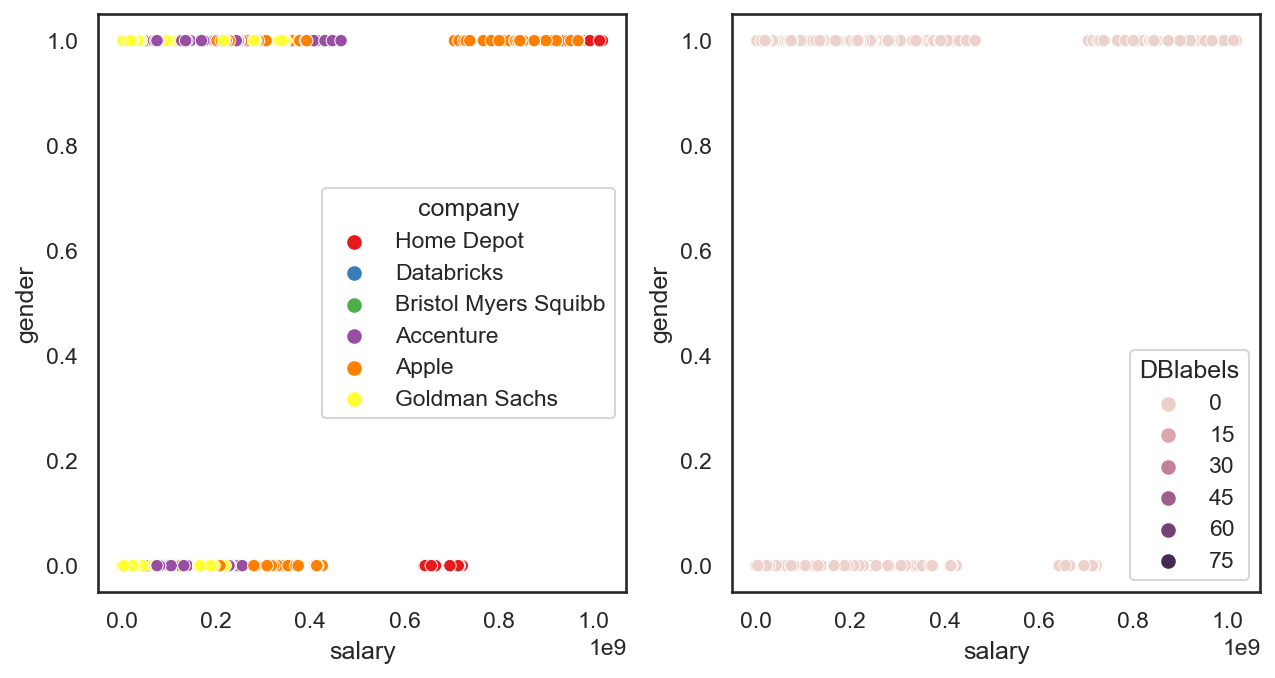

In [7]:
###### DBSCAN ######

# Import necessary library for DBSCAN clustering
# . plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
from sklearn.cluster import DBSCAN

# Use the eps and min_samples parameters to find the optimal number of clusters
model = DBSCAN(eps=0.000005, min_samples=6).fit(X)
labels_DB = model.labels_
df['DBlabels'] = labels_DB
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 150)
sns.scatterplot(x = X['salary'], y = X['gender'], hue = 'company', data = df, ax = ax[0])
sns.scatterplot(x = X['salary'], y = X['gender'], hue = 'DBlabels', data = df, ax = ax[1])

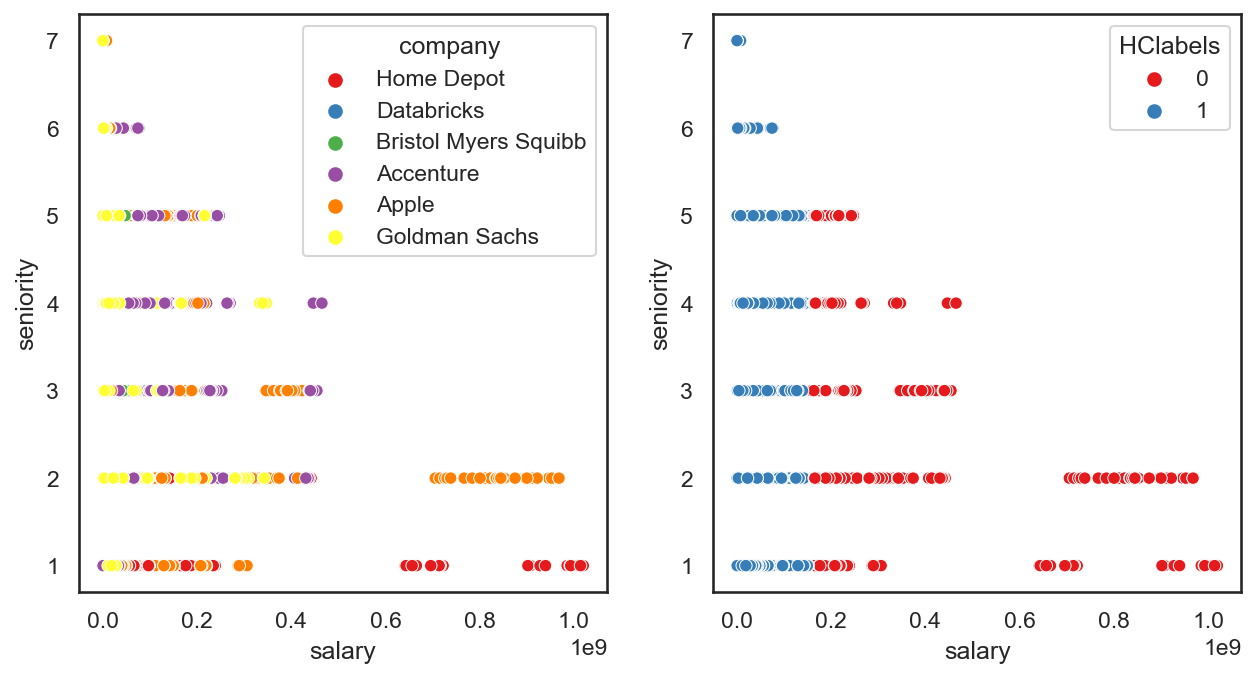

In [9]:
###### HIERARCHICAL CLUSTERING ######

# Perform Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering( ).fit(X)
HClabels = model.labels_
df['HClabels'] = HClabels

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi = 150)
sns.scatterplot(x='salary', y='seniority', hue='company', data=df, ax=ax[0])
sns.scatterplot(x='salary', y='seniority', hue='HClabels', data=df, ax=ax[1])

# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
plt.figure(figsize=(10, 10))
Z = linkage(X, method='ward')
dend = dendrogram(Z)
plt.axhline(y=21, color='r', label='21')

### 3.4 Final Results

## 4. Results

## 5. Conclusions